In [29]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv('short_titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

Size of a dataset

In [12]:
titanic.shape

(891, 12)

Survived

In [15]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

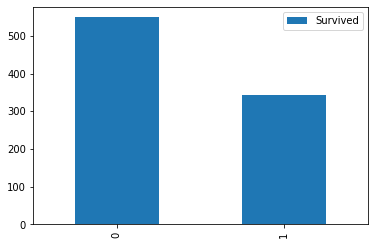

In [28]:
graph.plot(kind='bar', legend=True)

we can change
the column to hold 1 if the passenger was female and 0 if they were male

It works the same way as Ternary operator

In [30]:
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)

In [31]:
titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int32

describe all the columns at once

In [33]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Dealing with missing values

When dealing with missing values, you usually have the following two options:
• Drop the row with the missing value
• Try to fill it in

In [35]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

fill in each missing value of the Age column with the overall average age of
the people in the dataset

we will use two new methods, called mean and
fillna.

Get missing values

In [36]:
sum(titanic['Age'].isnull())

177

get the average age

In [38]:
average_age = titanic['Age'].mean()
average_age

29.69911764705882

use the fillna
method to remove null values

In [40]:
titanic['Age'].fillna(average_age, inplace=True)

Check for null values

In [42]:
sum(titanic['Age'].isnull())

0

In [47]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
titanic["Age"].tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

what is the average age for a female or a male?

we can filter by
each gender and take the mean age

In [48]:
titanic.groupby('Sex')['Age'].mean()

Sex
0    30.505824
1    28.216730
Name: Age, dtype: float64

In [55]:
grp_gender = titanic.groupby('Sex')
grp_gender_age = grp_gender["Age"]
avg_grp_gender = grp_gender_age.mean()

In [56]:
avg_grp_gender

Sex
0    30.505824
1    28.216730
Name: Age, dtype: float64